In [57]:
import statsmodels
import scipy
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.graphics.regressionplots import plot_leverage_resid2
import matplotlib.pyplot as plt

In [58]:
df = pd.read_csv('gene_high_throughput_sequencing.csv')
df

,Patient_id,Diagnosis,LOC643837,LOC100130417,SAMD11,NOC2L,KLHL17,PLEKHN1,C1orf170,HES4,...,CLIC2,RPS4Y1,ZFY,PRKY,USP9Y,DDX3Y,CD24,CYorf15B,KDM5D,EIF1AY
0,STT5425_Breast_001_normal,normal,1.257614,2.408148,13.368622,9.494779,20.880435,12.722017,9.494779,54.349694,...,4.761250,1.257614,1.257614,1.257614,1.257614,1.257614,23.268694,1.257614,1.257614,1.257614
1,STT5427_Breast_023_normal,normal,4.567931,16.602734,42.477752,25.562376,23.221137,11.622386,14.330573,72.445474,...,6.871902,1.815112,1.815112,1.815112,1.815112,1.815112,10.427023,1.815112,1.815112,1.815112
2,STT5430_Breast_002_normal,normal,2.077597,3.978294,12.863214,13.728915,14.543176,14.141907,6.232790,57.011005,...,7.096343,2.077597,2.077597,2.077597,2.077597,2.077597,22.344226,2.077597,2.077597,2.077597
3,STT5439_Breast_003_normal,normal,2.066576,8.520713,14.466035,7.823932,8.520713,2.066576,10.870009,53.292034,...,5.200770,2.066576,2.066576,2.066576,2.066576,2.066576,49.295538,2.066576,2.066576,2.066576
4,STT5441_Breast_004_normal,normal,2.613616,3.434965,12.682222,10.543189,26.688686,12.484822,1.364917,67.140393,...,11.227770,1.364917,1.364917,1.364917,1.364917,1.364917,23.627911,1.364917,1.364917,1.364917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,STT5750_Breast_021_DCIS,cancer,1.466240,3.689955,21.331981,19.359546,23.505609,11.576176,11.325851,80.572057,...,2.807635,1.466240,2.807635,1.466240,2.807635,3.689955,18.449777,1.466240,1.466240,1.466240
68,STT5751_Breast_021_IDC,cancer,2.492410,12.279444,30.087759,17.703926,26.064890,10.707081,11.520120,65.041865,...,2.492410,2.492410,1.301619,3.275668,1.301619,1.301619,8.601194,1.301619,1.301619,1.301619
69,STT5758_Breast_022_IDC,cancer,3.530477,20.006038,53.924651,25.449565,30.949995,16.794696,17.121366,70.958462,...,1.176826,1.176826,1.176826,2.961613,1.176826,1.176826,10.764365,1.176826,1.176826,1.176826
70,STT5763_Breast_022_IDC,cancer,3.733734,8.860505,32.538666,21.585069,24.987992,11.460224,11.201202,67.767125,...,2.840946,1.483635,1.483635,1.483635,1.483635,1.483635,8.522837,1.483635,1.483635,1.483635


In [59]:
import scipy

In [60]:
normal = df[df.Diagnosis == 'normal']
early = df[df.Diagnosis == 'early neoplasia']
cancer = df[df.Diagnosis == 'cancer']

In [204]:
gen_names = df.columns[2:]

norm_ear_canc = dict()
ear_canc_abs_cans = dict()

for name in gen_names:
    norm_ear_canc[name] = scipy.stats.ttest_ind(normal[name],early[name],equal_var=False)[1]
    ear_canc_abs_cans[name] = scipy.stats.ttest_ind(early[name],cancer[name],equal_var=False)[1]

In [78]:
def write_answer(val, answer_file):
    f = open(answer_file, 'w');
    f.write(str(val))
    f.close()

In [168]:
counter_1 = 0
counter_2 = 0

for name in gen_names:
    if norm_ear_canc[name] < 0.05:
        counter_1+=1
    if ear_canc_abs_cans[name] < 0.05:
        counter_2+=1

print(counter_1,counter_2,sep=' ')

1575 3490


In [81]:
write_answer(counter_1, 'c4w4gene/1.txt')
write_answer(counter_2, 'c4w4gene/2.txt')

Цель исследований — найти гены, средняя экспрессия которых отличается не только статистически значимо, но и достаточно сильно. В экспрессионных исследованиях для этого часто используется метрика, которая называется fold change (кратность изменения). Определяется она следующим образом:

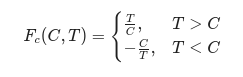

где C, TC,T — средние значения экспрессии гена в control и treatment группах соответственно. По сути, fold change показывает, во сколько раз отличаются средние двух выборок.

In [196]:
first_name = []
second_name = []
for name in gen_names:
    first = normal[name].mean()/early[name].mean() if normal[name].mean() > early[name].mean() else (-1)*early[name].mean()/normal[name].mean()
    if(abs(first)>1.5):
        first_name.append(name)
    second = early[name].mean()/cancer[name].mean() if early[name].mean() > cancer[name].mean() else (-1)*cancer[name].mean()/early[name].mean()
    if(abs(second)>1.5):
        second_name.append(name)

In [197]:
norm_ear_canc = dict()
for name in first_name:
    norm_ear_canc[name] = scipy.stats.ttest_ind(normal[name],early[name],equal_var=False)[1]

In [198]:
ear_canc_abs_cans = dict()
for name in second_name:
    ear_canc_abs_cans[name] = scipy.stats.ttest_ind(early[name],cancer[name],equal_var=False)[1]

In [82]:
import statsmodels.stats.multitest as smm

In [156]:
?smm.multipletests

In [199]:
smm.multipletests(np.array(list(norm_ear_canc.values())), alpha=0.05, method='holm')[0].sum()

31

In [200]:
smm.multipletests(np.array(list(ear_canc_abs_cans.values())), alpha=0.05, method='holm')[0].sum()

217

In [205]:
a3 = smm.multipletests(list(norm_ear_canc.values()), alpha=0.05/2., method='bonferroni')[0].sum()
a4 = smm.multipletests(list(ear_canc_abs_cans.values()), alpha=0.05/2., method='bonferroni')[0].sum()
print(a3, a4)
write_answer(a3, 'c4w4gene/3.txt')
write_answer(a4, 'c4w4gene/4.txt')

2 79


In [215]:
len(second_name)

1071

In [212]:
a5 = smm.multipletests(list(norm_ear_canc.values()), alpha=0.011, method='fdr_bh')[0].sum()
a6 = smm.multipletests(list(ear_canc_abs_cans.values()), alpha=0.011, method='fdr_bh')[0].sum()
print(a5, a6)
write_answer(a5, 'c4w4gene/5.txt')
write_answer(a6, 'c4w4gene/6.txt')

4 524
